# Aggregation and filtering

Both aggregation and filtering are fundamental to the use of Geospatial APIs. The aim is to reduce the amount of data that has to be moved for subsequent analysis and processing.

While aggregation is powerful, it is still limited, i.e. while it is straightforward to calculate the total precipitation over a single calendar year or the mean temperature in 2023, it is not possible using aggregation to calculate e.g. the mean temperature during January during the years 2019-2023.

## Temporal

Imagine a junior researcher joining the Geospatial APIs team at the IBM Thomas J. Watson Research Center in Yorktown Heights, NY. As the weather conditions of the local area alter due to the affects of climate change- days where it rains have increased. 

To find a good place to live in the local area, the researcher decides to use Geospatial APIs to create a flood risk model to determine where a flood is least likely.

To gather data for the model, the researcher considers that flood risk is based on precipitation, yet also on various soil properties such as water holding capacity and elevation (living on higher ground lessens the risk). The following candidate layers are identified as ones that may help model the issue:

|ID|Data Set|Data Layer|
|--|--------|----------|
|91|Prism Historical Data|Daily Precipitation|
|48689|US Soil Properties|Avail Water Holding Capacity 0 to 50 cm depth|
|48690|US Soil Properties|Avail Water Holding Capacity 50 to 100 cm depth|
|48623|US Soil Properties|Clay 0 to 50 cm depth|
|48693|US Soil Properties|Clay 50 to 100 cm depth|
|48621|US Soil Properties|Sand 0 to 50 cm depth|
|48694|US Soil Properties|Sand 50 to 100 cm depth|
|140|USA Elevation|USA Elevation|

The properties of the soil change rarely, as a result US Soil Properties data has a single timestamp date, `2015-01-01T00:00:00Z` that can be found with a [Snapshot](temporal.ipynb) in a [Point Query](../quickstart/point_query.ipynb).

The researcher decides that daily amounts of precipitation are not that important- what is relevant is the daily maximum which would indicate ***how bad it could get***.

Moreover, the researcher decides only locations below a certain altitude, e.g. 110 meters above sea level, will illustrate areas susceptible to flooding. Anything higher is sufficiently protected from flooding by virtue of elevation. With all this in mind, they launch the following query:

In [ ]:
%pip install ibmpairs
%pip install configparser

In [7]:
import ibmpairs.authentication as authentication
import ibmpairs.client as client
import ibmpairs.query as query
import ibmpairs.catalog as catalog
from ibmpairs.logger import logger

import os

import configparser

config = configparser.RawConfigParser()
config.read('../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id') 

# Authenticate and get a client object.
ei_client = client.get_client(api_key   = EI_API_KEY,
                              tenant_id = EI_TENANT_ID,
                              org_id    = EI_ORG_ID)

2025-01-22 14:36:18 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-22 14:36:18 - paw - INFO - Legacy Environment is False
2025-01-22 14:36:18 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-22 14:36:20 - paw - INFO - Authentication success.
2025-01-22 14:36:20 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


In [2]:
query_dict = {
  "layers": [
    {
      "alias": "Elevation",
      "type": "raster",
      "id": "140",
      "temporal": {"intervals": [{"start": "2013-01-01T00:00:00Z", "end": "2013-01-01T00:00:00Z"}]},
      "aggregation": "Max",
      "filter": {"expression": "LT 110"}
    },
    {
      "alias": "Maximum Daily Precipitation",
      "type": "raster",
      "id": "91",
      "aggregation": "Max"
    },
    {
      "alias": "Water Holding Capacity (0 to 50 cm)",
      "type": "raster",
      "id": "48689",
      "temporal": {"intervals": [{"snapshot": "2015-01-01T00:00:00Z"}]}
    },
    {
      "alias": "Water Holding Capacity (50 to 100 cm)",
      "type": "raster",
      "id": "48690",
      "temporal": {"intervals": [{"snapshot": "2015-01-01T00:00:00Z"}]}
    },
    {
      "alias": "Clay (0 to 50 cm)",
      "type": "raster",
      "id": "48623",
      "temporal": {"intervals": [{"snapshot": "2015-01-01T00:00:00Z"}]}
    },
    {
      "alias": "Clay (50 to 100 cm)",
      "type": "raster",
      "id": "48693",
      "temporal": {"intervals": [{"snapshot": "2015-01-01T00:00:00Z"}]}
    },
    {
      "alias": "Sand (0 to 50 cm)",
      "type": "raster",
      "id": "48621",
      "temporal": {"intervals": [{"snapshot": "2015-01-01T00:00:00Z"}]}
    },
    {
      "alias": "Sand (50 to 100 cm)",
      "type": "raster",
      "id": "48694",
      "temporal": {"intervals": [{"snapshot": "2015-01-01T00:00:00Z"}]}
    }
  ],
  "spatial": {
    "type": "square",
    "coordinates": ["41.228301","-73.81108","41.264517","-73.742310"]
  },
  "temporal": {
    "intervals": [{"start": "2023-01-01T00:00:00Z","end": "2023-12-31T00:00:00Z"}]
  }
}


query_result = query.submit_check_status_and_download(query_dict)

2025-01-22 14:30:42 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-22 14:30:44 - paw - INFO - The query was successfully submitted with the id: 1737504000_32444299.
2025-01-22 14:30:45 - paw - INFO - The query 1737504000_32444299 has the status Queued.
2025-01-22 14:31:16 - paw - INFO - The query 1737504000_32444299 has the status Running.
2025-01-22 14:31:47 - paw - INFO - The query 1737504000_32444299 has the status Running.
2025-01-22 14:32:18 - paw - INFO - The query 1737504000_32444299 has the status Running.
2025-01-22 14:32:49 - paw - INFO - The query 1737504000_32444299 has the status Running.
2025-01-22 14:33:20 - paw - INFO - The query 1737504000_32444299 has the status Succeeded.
2025-01-22 14:33:20 - paw - INFO - The query 1737504000_32444299 was successful after checking the status.
2025-01-22 14:33:51 - paw - INFO - The query 1737504000_32444299 has the status Succeeded.
2025-01-22 14:33:51 - paw - INFO - The query 1737504000_32444299 was successf

### Understanding the example

Let’s take a moment to take a closer look at the query json above. 

Note that several layer blocks have their own temporal key, which overrides the global temporal value. For the soil properties, the researcher is directly requesting `2015-01-01T00:00:00Z`. 

For the precipitation `max` aggregation is considered; other options are, `sum`, `min` and `mean`. 

The most complicated piece, is the block requesting and filtering by the elevation layer (ID 140). In order to filter by a layer, the temporal dependence must be removed; hence the aggregation. Layer 140 only has a single timestamp, so the aggregation itself in this instance is meaningless; yet submitting this query without it would result in an error message. 

The filter is defined via `"filter" : {"expression" : "LT 110"}`, restricting the data to elevations below 110m.

In [3]:
raster_results = query_result.list_files()
print(*raster_results, sep='\n')

/Environmental-Intelligence/download/1737504000_32444299/USDA soil properties-Clay (0 to 50 cm)[Clay (0 to 50 cm)]-01_01_2015T00_00_00.tiff.json
/Environmental-Intelligence/download/1737504000_32444299/USDA soil properties-Sand (0 to 50 cm)[Sand (0 to 50 cm)]-01_01_2015T00_00_00.tiff
/Environmental-Intelligence/download/1737504000_32444299/USDA soil properties-Clay (50 to 100 cm depth)[Clay (50 to 100 cm)]-01_01_2015T00_00_00.tiff.json
/Environmental-Intelligence/download/1737504000_32444299/USDA soil properties-Sand (50 to 100 cm)[Sand (50 to 100 cm)]-01_01_2015T00_00_00.tiff.json
/Environmental-Intelligence/download/1737504000_32444299/PRISM daily US weather-Daily precipitation[Maximum Daily Precipitation]-Max.tiff
/Environmental-Intelligence/download/1737504000_32444299/USDA soil properties-Water holding capacity (50 to 100 cm)[Water Holding Capacity (50 to 100 cm)]-01_01_2015T00_00_00.tiff.json
/Environmental-Intelligence/download/1737504000_32444299/USDA soil properties-Water hold

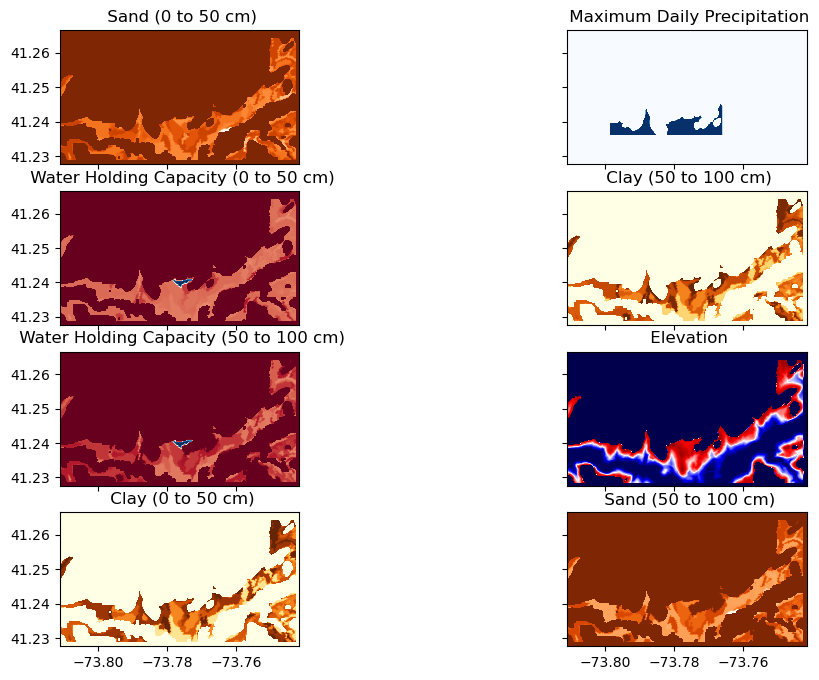

In [8]:
import json
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

tiff_files = []

for file in raster_results:
    if file.endswith('.tiff'):
        with open(file+'.json', 'r') as metadata_file:
            metadata = json.load(metadata_file)
        bbox=metadata["boundingBox"]
        extent=[bbox["minLongitude"],
                bbox["maxLongitude"],
                bbox["minLatitude"],
                bbox["maxLatitude" ]]
        vmin = metadata["rasterStatistics"]["pixelMin"]
        vmax = metadata["rasterStatistics"]["pixelMax"]
        data = np.array(PIL.Image.open(file))
        title = file.split('[')[1].split(']')[0]
        if 'Elevation' in file:
            cmap = 'seismic'
        elif 'Water holding capacity' in file:
            cmap = 'RdBu'
        elif 'Sand' in file:
            cmap = 'Oranges_r'
        elif 'Clay' in file:
            cmap = 'YlOrBr'
        else:
            cmap = 'Blues'
        
        entry = {"file": file,
                 "title": title,
                 "data": data,
                 "bbox": bbox, 
                 "extent": extent, 
                 "vmin": vmin, 
                 "vmax": vmax,
                 "cmap": cmap
                }
        tiff_files.append(entry)

#fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)

fig, axs = plt.subplots(4, 2, figsize = (12, 8), sharex=True, sharey=True)

axs[0, 0].imshow(tiff_files[0]["data"], extent = tiff_files[0]["extent"],
                 cmap = tiff_files[0]["cmap"], vmax = tiff_files[0]["vmax"], 
                 vmin = tiff_files[0]["vmin"])
axs[0, 0].set_title(" " + os.path.basename(tiff_files[0]["title"]))
axs[0, 1].imshow(tiff_files[1]["data"], extent = tiff_files[1]["extent"], 
                 cmap = tiff_files[1]["cmap"], vmax = tiff_files[1]["vmax"], 
                 vmin = tiff_files[1]["vmin"])
axs[0, 1].set_title(" " + os.path.basename(tiff_files[1]["title"]))
axs[1, 0].imshow(tiff_files[2]["data"], extent = tiff_files[2]["extent"], 
                 cmap = tiff_files[2]["cmap"], vmax = tiff_files[2]["vmax"], 
                 vmin = tiff_files[2]["vmin"])
axs[1, 0].set_title(" " + os.path.basename(tiff_files[2]["title"]))
axs[1, 1].imshow(tiff_files[3]["data"], extent = tiff_files[3]["extent"], 
                 cmap = tiff_files[3]["cmap"], vmax = tiff_files[3]["vmax"], 
                 vmin = tiff_files[3]["vmin"])
axs[1, 1].set_title(" " + os.path.basename(tiff_files[3]["title"]))
axs[2, 0].imshow(tiff_files[4]["data"], extent = tiff_files[4]["extent"], 
                 cmap = tiff_files[4]["cmap"], vmax = tiff_files[4]["vmax"], 
                 vmin = tiff_files[4]["vmin"])
axs[2, 0].set_title(" " + os.path.basename(tiff_files[4]["title"]))
axs[2, 1].imshow(tiff_files[5]["data"], extent = tiff_files[5]["extent"], 
                 cmap = tiff_files[5]["cmap"], vmax = tiff_files[5]["vmax"], 
                 vmin = tiff_files[5]["vmin"])
axs[2, 1].set_title(" " + os.path.basename(tiff_files[5]["title"]))
axs[3, 0].imshow(tiff_files[6]["data"], extent = tiff_files[6]["extent"], 
                 cmap = tiff_files[6]["cmap"], vmax = tiff_files[6]["vmax"], 
                 vmin = tiff_files[6]["vmin"])
axs[3, 0].set_title(" " + os.path.basename(tiff_files[6]["title"]))
axs[3, 1].imshow(tiff_files[7]["data"], extent = tiff_files[7]["extent"], 
                 cmap = tiff_files[7]["cmap"], vmax = tiff_files[7]["vmax"], 
                 vmin = tiff_files[7]["vmin"])
axs[3, 1].set_title(" " + os.path.basename(tiff_files[7]["title"]))
    
plt.show()


The Geospatial APIs query has only returned data for areas with sufficiently low elevation (LT 110). It is similarly noteworthy however, that we are dealing with data layers of vastly different resolution, which should be obvious when comparing the Maximum daily precipitation plot to Elevation. 

As a matter of fact Elevation has the highest resolution, with the various soil property layers closely behind. It is important to keep in mind that Geospatial APIs boosts the resolution of all data layers that appear in a single query to the resolution of the most fine-grained layer.

> **_NOTE:_** In general the fact that all the raster data returned by a single query is of identical resolution with no relative offsets between grid points is incredibly useful, i.e. the returned arrays can be stacked into a single cube for direct analysis without any concerns whether the grid points are correctly aligned. (They are!) However, one should also keep in mind that this affects the amount of data returned by a query. All data returned will be of maximum resolution. The difference in resolution between the precipitation and elevation data layers used above is roughly a factor of  along each axis.

## Spatial

The result of a raster query can be aggregated spatially by modifying the `"spatial"` section of a query accordingly. Note that this feature requires the the query to be performed over a polygon. In other words, the value of the `"type"` field has to be `"poly"`.

```python
{
  "layers": [
      {
          "alias" : "PRISM",
          "id": '92',
          "output": True,
          "aggregation" : "Max",
          "type": "raster"
      }
  ],
  "spatial" : {
      "type" : "poly", "aoi" : "125",
      "aggregation": {
          "aoi": ["125"]
      }
  },
  "temporal": {"intervals": [{"start" : "2019-01-01T00:00:00Z", "end" : "2020-01-01T00:00:00Z"}]},
}
```

The only novelty here is the appearance of `"aggregation"` in the `"spatial"` descriptor of the query. The value of `"aggregation"` is a list of polygon IDs, over which the query should aggregate. Note that these have to be subsets of the polygon defined by `"aoi" : "125"` over which the query is performed. In the case above, the query is an aggregation over California (125). If instead the query defined:

```python
"spatial" : {
    "type" : "poly", "aoi" : "24",
    "aggregation": {
        "aoi": [str(poly) for poly in range(121, 172)]
    }
}
```

the query would return the conterminous USA (24) and aggregations over states (and Washington D.C.).

Spatial aggregation always returns the area (in Km**2) as well as the minimum, maximum, mean and 2nd moment. Returning to the above example, Geospatial APIs returns a .csv file with the following contents:

|Geospatial APIs Polygon ID|count()[unit: km^2]|min()|max()|mean()|2nd moment|
|--------------------------|-------------------|-----|-----|------|----------|
|125|426691.3|290.8|324.2|310.6|96522.2|

For further information on AOIs please see the `Area of Interest (AOI)` section of [Spatial](spatial.ipynb).